In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Code

/content/gdrive/MyDrive/Code


In [ ]:
import cv2
import math
from object_detection import ObjectDetection
from google.colab.patches import cv2_imshow

In [ ]:
# Initialize Object Detection
od = ObjectDetection()

Loading Object Detection
Running opencv dnn with YOLOv4


In [ ]:
cap = cv2.VideoCapture("videos/v3.mp4")

In [ ]:
# Initialize Global Variables
count = 0
center_points_prev_frame = []

tracking_objects = {}
track_id = 0

Tracking objects
{}
CUR FRAME LEFT PTS
[(931, 558), (1453, 543), (175, 516), (1797, 531), (35, 417), (1527, 527), (1646, 524), (1698, 518), (1887, 523), (61, 417), (1735, 515), (462, 489), (846, 502), (888, 672), (1440, 611), (197, 617), (1630, 571), (1793, 577), (1872, 562), (1702, 558), (1539, 579), (1781, 408), (1119, 401), (1424, 419), (328, 388)]


Tracking objects
{0: (940, 560), 1: (1459, 545), 2: (1797, 532), 3: (193, 517), 4: (1699, 517), 5: (1649, 525), 6: (1889, 521), 7: (1530, 528), 8: (26, 417), 9: (63, 415), 10: (470, 488), 11: (848, 502), 12: (902, 675), 13: (1453, 607), 14: (1636, 562), 15: (203, 614), 16: (1872, 561), 17: (1794, 577), 18: (1782, 405), 19: (1119, 395), 20: (1426, 418), 21: (334, 387)}
CUR FRAME LEFT PTS
[(940, 560), (1459, 545), (1797, 532), (193, 517), (1699, 517), (1649, 525), (1889, 521), (1530, 528), (26, 417), (63, 415), (470, 488), (848, 502), (902, 675), (1453, 607), (1636, 562), (203, 614), (1872, 561), (1794, 577), (1782, 405), (1119, 395), (1426, 418), (334, 387), (796, 497)]


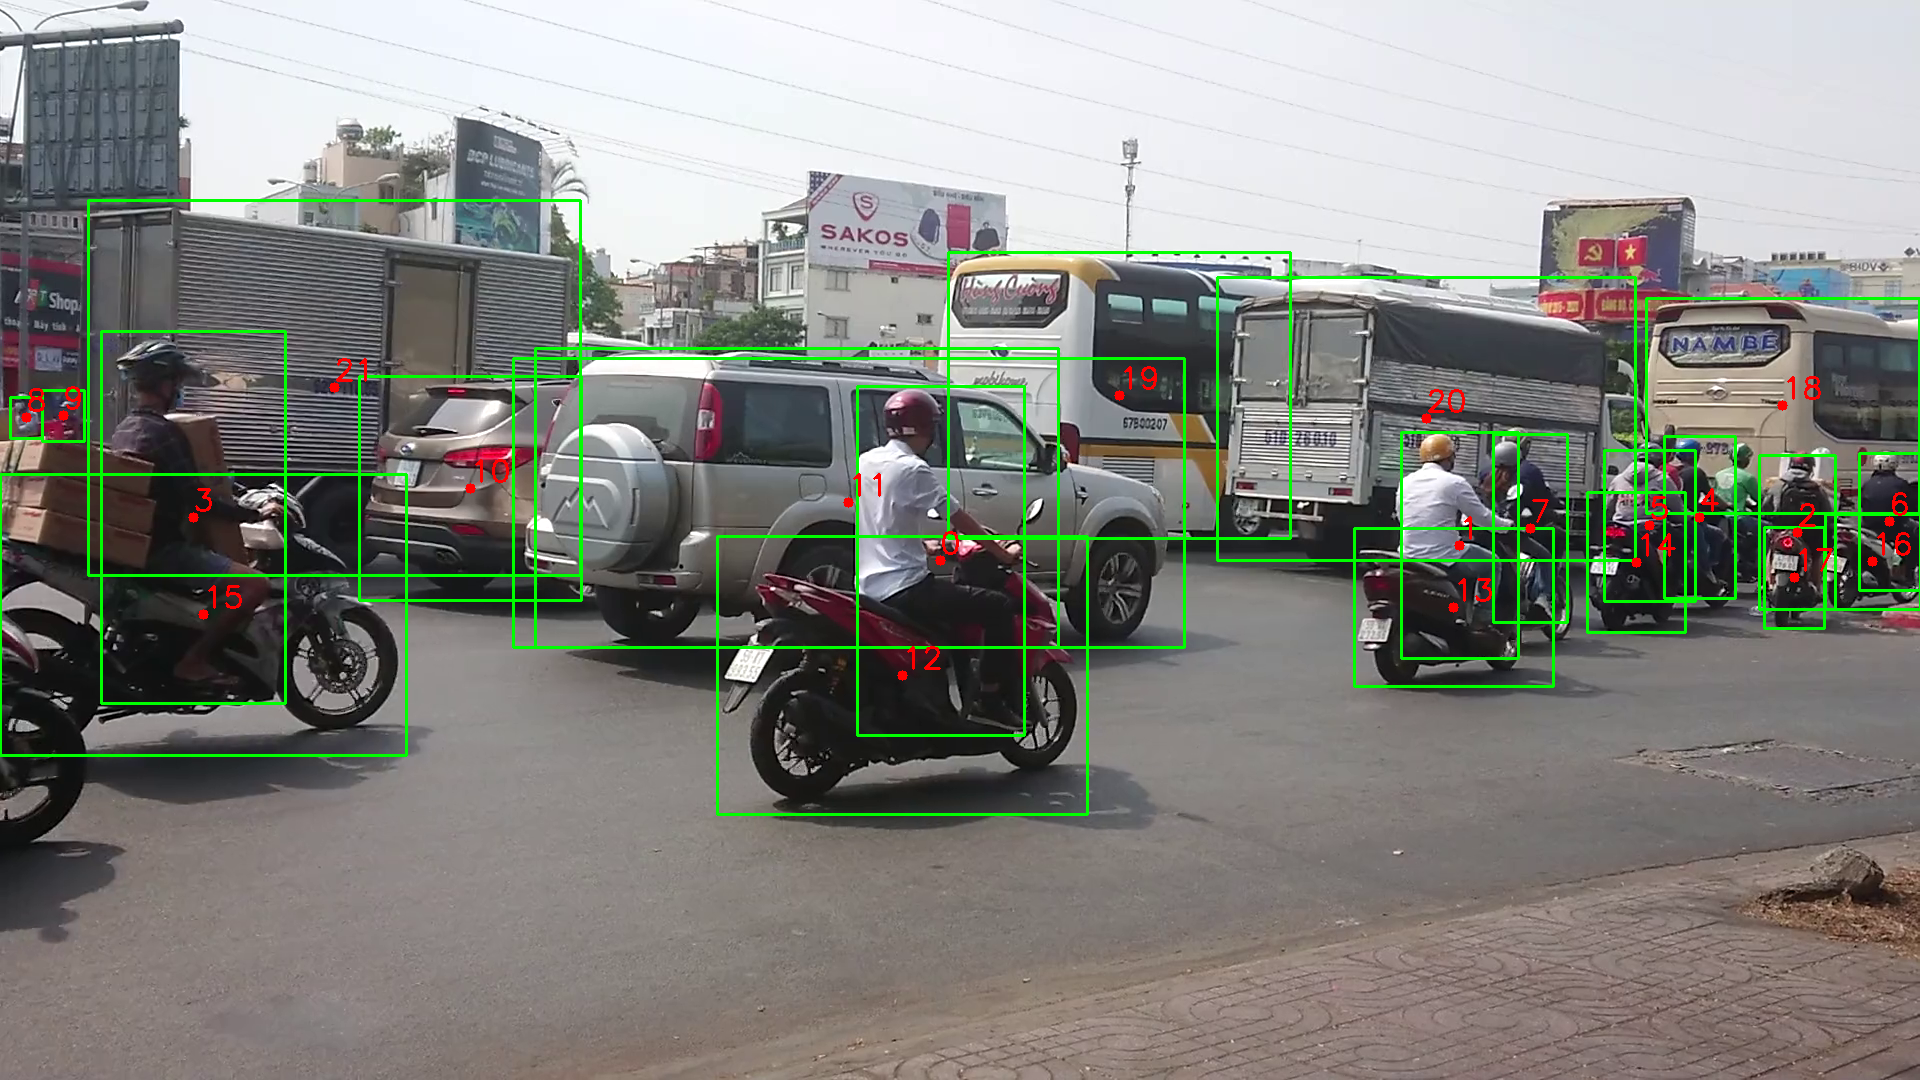

Tracking objects
{0: (949, 560), 1: (1464, 543), 2: (1801, 528), 3: (211, 520), 4: (1703, 517), 5: (1651, 524), 6: (1890, 522), 7: (1528, 530), 8: (20, 418), 9: (63, 415), 10: (478, 489), 11: (851, 504), 12: (916, 672), 13: (1458, 605), 14: (1634, 573), 15: (207, 613), 16: (1873, 561), 17: (1794, 576), 18: (1782, 405), 19: (1119, 401), 20: (1425, 421), 22: (54, 666)}
CUR FRAME LEFT PTS
[(54, 666)]


Tracking objects
{0: (955, 558), 1: (1469, 542), 2: (1804, 527), 3: (229, 520), 4: (1707, 520), 5: (1655, 524), 6: (1891, 521), 7: (1536, 530), 9: (57, 417), 10: (485, 489), 11: (853, 504), 12: (921, 669), 13: (1466, 606), 14: (1636, 573), 15: (218, 614), 16: (1874, 562), 17: (1796, 576), 18: (1783, 406), 19: (1119, 402), 20: (1427, 429), 22: (63, 666), 23: (1749, 516)}
CUR FRAME LEFT PTS
[(1749, 516)]


In [ ]:
while True:
    ret, frame = cap.read()
    count += 1
    if not ret or count == 5:
        break

    # Point current frame
    center_points_cur_frame = []

    # Detect vehicles on frame
    (class_ids, scores, boxes) = od.detect(frame)
    for box in boxes:
        (x, y, w, h) = box
        cx = int((x+x+w) / 2)
        cy = int((y+y+h) / 2)
        center_points_cur_frame.append((cx,cy))
        #print("FRAME N°", count, " ", x, y, w, h)

        # cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Only at the beginning we compare previous and current frame
    if count <= 2:
        for pt in center_points_cur_frame:
            for pt2 in center_points_prev_frame:
                distance = math.hypot(pt2[0] - pt[0], pt2[1] - pt[1])

                if distance < 20:
                    tracking_objects[track_id] = pt
                    track_id += 1
    else:
        tracking_objects_copy = tracking_objects.copy()
        center_points_cur_frame_copy = center_points_cur_frame.copy()

        for object_id, pt2 in tracking_objects_copy.items():
            object_exists = False
            for pt in center_points_cur_frame_copy:
                distance = math.hypot(pt2[0] - pt[0], pt2[1] - pt[1])

                # Update IDs position
                if distance < 20:
                    tracking_objects[object_id] = pt
                    object_exists = True
                    if pt in center_points_cur_frame:
                        center_points_cur_frame.remove(pt)
                    continue

            # Remove IDs lost
            if not object_exists:
                tracking_objects.pop(object_id)

        # Add new IDs found
        for pt in center_points_cur_frame:
            tracking_objects[track_id] = pt
            track_id += 1

    for object_id, pt in tracking_objects.items():
        cv2.circle(frame, pt, 5, (0, 0, 255), -1)
        cv2.putText(frame, str(object_id), (pt[0], pt[1] - 7), 0, 1, (0, 0, 255), 2)

    print("Tracking objects")
    print(tracking_objects)

    print("CUR FRAME LEFT PTS")
    print(center_points_cur_frame)

    cv2_imshow(frame)

    # Make a copy of the points
    center_points_prev_frame = center_points_cur_frame.copy()

    key = cv2.waitKey(1)
    if key == 27:
        break

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
print("Density (Vehicles Count) : ",len(tracking_objects))

Density (Vehicles Count) :  22
